<h1 align='center'> Stroke prediction </h1>
<h5 align='center'> ---------------------------------------------------------------------------- </h5>

Name: Logesh.V <br>
Email: vlogesh2001@gmail.com <br>

--------------------------------

## Import Libraries

In [1]:
#Import Libraries
import sys
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Data Analysis
<br>Reading the data csv file as dataframe and printing first 5 rows

In [2]:
dff = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("Dimensions = ",dff.shape)
dff.head()

Dimensions =  (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Data information
print("Info :")
dff.info()

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#Finding Null values
print("Null count :")
dff.isnull().sum()

Null count :


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#data description
dff.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#Replacing null BMI data entries with mean BMI
dff['bmi']=dff.bmi.fillna(dff.bmi.mean())
print("Data with no Null-Entries => Null count :")
dff.isnull().sum()

Data with no Null-Entries => Null count :


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

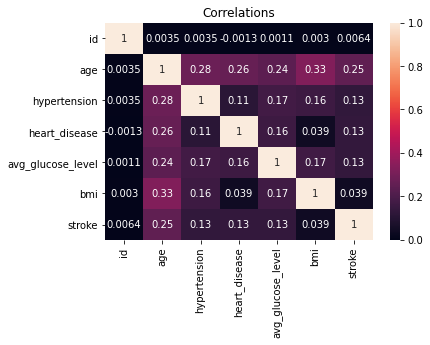

In [7]:
#just checking correlations
plt.title("Correlations")
sns.heatmap(dff.corr(),annot=True)
plt.show()

<br> **As we can see the dataset input have various labels, which needs to converted to numerical format**

In [8]:
df = pd.get_dummies(dff, drop_first = True)
features = list(df.columns.values)
print("Features:", features)
df

Features: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


<br>Converting Dataframe to Numpy Arrays, so it would be numerical values instead of string</br>
<br>X -> input data features
<br>Y -> input data classification</br>

In [9]:
i = features.index('stroke')
# ignore ID column (first column)
X = np.concatenate((df.iloc[:,1:i].values , df.iloc[:,i:None].values), axis=1)
Y = df.iloc[:,i].values
try:
    features.remove('id')
except:
    pass
print("Features:", features)
print("\nDimentions of X:",X.shape, "\tDimentions of Y:", Y.shape)

np.set_printoptions(precision=2, suppress=True, threshold=25) #changing printing options

# Some of the patients details are unknown, lets fill with 0 (meaning unknown)
#X = np.nan_to_num(X)
print("X data: \n", X)
print("Y data: \n", Y)

Features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']

Dimentions of X: (5110, 17) 	Dimentions of Y: (5110,)
X data: 
 [[67.  0.  1. ...  1.  0.  0.]
 [61.  0.  0. ...  0.  1.  0.]
 [80.  0.  1. ...  0.  1.  0.]
 ...
 [35.  0.  0. ...  0.  1.  0.]
 [51.  0.  0. ...  1.  0.  0.]
 [44.  0.  0. ...  0.  0.  0.]]
Y data: 
 [1 1 1 ... 0 0 0]


<br>Spliting the dataset into Train Data and Test Data based on some ratio

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.225, random_state=0)
print("Train Set Dimensions:\n X:", X_train.shape, "\n Y:", Y_train.shape)
print("\nTest Set Dimensions:\n X:", X_test.shape, "\n Y:", Y_test.shape)

Train Set Dimensions:
 X: (3960, 17) 
 Y: (3960,)

Test Set Dimensions:
 X: (1150, 17) 
 Y: (1150,)


## Decision Tree Classification

(Decision Tree) Test Data Accuracy: 100.0 %	 Train Data Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

Test Data Confusion Matrix:
 [[1089    0]
 [   0   61]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1089
           1       1.00      1.00      1.00        61

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150


Test Data Total Correct Prediction = 1150 / 1150


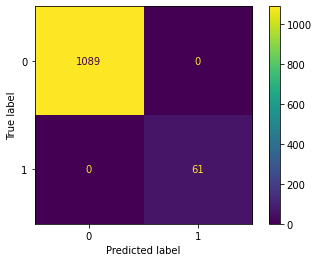


Train Data Confusion Matrix:
 [[3772    0]
 [   0  188]]

Train Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3772
           1       1.00      1.00      1.00       188

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960


Train Data Total Correct Prediction = 3960 / 3960


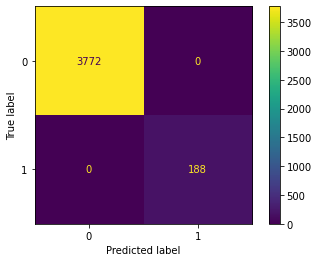

In [11]:
#3-> Decision Tree

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

test_Y_pred = dt.predict(X_test)
train_Y_pred = dt.predict(X_train)
CM_test = confusion_matrix(Y_test, test_Y_pred)
CM_train = confusion_matrix(Y_train, train_Y_pred)

print("(Decision Tree) Test Data Accuracy:", accuracy_score(Y_test, test_Y_pred)*100, "%\t", "Train Data Accuracy:", accuracy_score(Y_train, train_Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((test_Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
print("\nTest Data Confusion Matrix:\n", CM_test)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, test_Y_pred))
print("\nTest Data Total Correct Prediction =", CM_test.trace(), "/", X_test.shape[0])
plot_confusion_matrix(dt, X_test, Y_test)
plt.show()
print("\nTrain Data Confusion Matrix:\n", CM_train)
print("\nTrain Data Classification Report:")
print(classification_report(Y_train, train_Y_pred))
print("\nTrain Data Total Correct Prediction =", CM_train.trace(), "/", X_train.shape[0])
plot_confusion_matrix(dt, X_train, Y_train)
plt.show()

In [12]:
#Example data: 
test_id = random.randint(0,dff.shape[0])
Model_Prediction = dt.predict([X[test_id]])
print("Model Prediction of Stroke for patient given below =", "Yes" if Model_Prediction else "No\n")
dff.iloc[[test_id]]

Model Prediction of Stroke for patient given below = No



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2710,61103,Female,64.0,1,0,Yes,Self-employed,Urban,190.92,31.4,never smoked,0


## **K**-Nearest Neighbors Classification

K-Value = 1 		Accuracy: 92.78260869565217 %
K-Value = 2 		Accuracy: 94.69565217391305 %
K-Value = 3 		Accuracy: 94.08695652173913 %

(KNN-classification) K-Neighbhor: 2 		Accuracy: 94.69565217391305 %

Test Data [Prediction | Actual results]:
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

 Confusion Matrix:
 [[1087    2]
 [  59    2]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1089
           1       0.50      0.03      0.06        61

    accuracy                           0.95      1150
   macro avg       0.72      0.52      0.52      1150
weighted avg       0.92      0.95      0.92      1150


Total Correct Prediction = 1089 / 1150


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

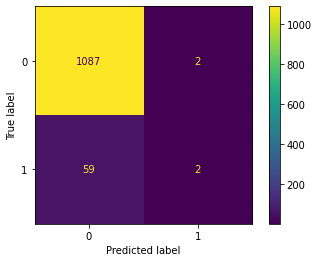

In [13]:
#2-> KNN Classification
#The best accuracy is usually in the middle not too high or not too low, so it needs to be found out by hit and trial
acc = 0
K = 0
for i in range(1,int(math.sqrt(len(features)))): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    print("K-Value =", i, "\t\tAccuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
    
    if(accuracy_score(Y_test, Y_pred)*100 > acc):
        acc = accuracy_score(Y_test, Y_pred)*100
        Y_pred_final = Y_pred
        K = i
        plt.clf()
        plot_confusion_matrix(knn, X_test, Y_test)

print("\n(KNN-classification) K-Neighbhor:", K, "\t\tAccuracy:", accuracy_score(Y_test, Y_pred_final)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred_final.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred_final)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred_final))
print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plt.show()

## SVM (Linear & **RBF**) Classification

(SVC - 'linear') Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

 Confusion Matrix:
 [[1089    0]
 [   0   61]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1089
           1       1.00      1.00      1.00        61

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150


Total Correct Prediction = 1150


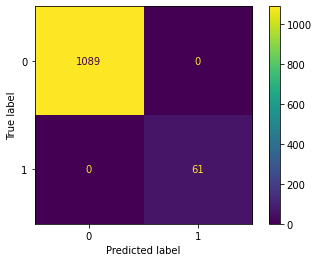




(SVC - 'rbf') Accuracy: 94.69565217391305 %

Test Data [Prediction | Actual results]:
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

 Confusion Matrix:
 [[1089    0]
 [  61    0]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1089
           1       0.00      0.00      0.00        61

    accuracy                           0.95      1150
   macro avg       0.47      0.50      0.49      1150
weighted avg       0.90      0.95      0.92      1150


Total Correct Prediction = 1089 / 1150


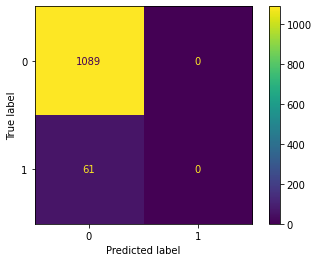

In [14]:
#3-> SVM

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print("(SVC - 'linear') Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
print("\nTotal Correct Prediction =", CM.trace())
plot_confusion_matrix(svc, X_test, Y_test)
plt.show()

svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print("\n\n\n(SVC - 'rbf') Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plot_confusion_matrix(svc, X_test, Y_test)
plt.show()

--------------------------------------------------------------------------------------------------
### x---------------------------- Thanking You ----------------------------x
--------------------------------------------------------------------------------------------------